In [1]:
import os
import cv2
import numpy as np
import tqdm as tqdm
from tqdm import tqdm as tqdm

In [2]:
# pre-processing flag for wether or not to rebuild data
REBUILD_DATA = False

In [3]:
class DogsVsCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    LABELS = {CATS: 0, DOGS: 1}     # 'classes', cat is 0, dog is 1
    catcount = 0                    # a count to test the balance of the training set
    dogcount = 0
    training_data = []              # will be populated with cats,dogs and corresponding labels for every cat and dog  
    
    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for file in tqdm(os.listdir(label)):
                try:
                    path = os.path.join(label, file)
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)    # is colour a defining feature of wether something is a cat or dog? no 
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))    # resize
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])

                    if label == self.CATS:
                        self.catcount += 1
                    elif label == self.DOGS:
                        self.dogcount += 1

                except Exception as e:
                    pass
                    # print(str(e))
                    
        # shuffle
        np.random.shuffle(self.training_data)
        # save np.save(save as, save what)
        np.save("training_data.npy", self.training_data)
            
        print('Cats: ', self.catcount)
        print('Dogs: ', self.dogcount)
            
            
            
if REBUILD_DATA:
    dogsvcats = DogsVsCats()
    dogsvcats.make_training_data()

^ Using a one hot vector approach for output as opposed to scaler values.
Each one of the labels, Cats and Dogs, have a class associated with them, a 0 and a 1 which are the class names and have nothing to do with the output values.

To better understand one hot vector in this example, we know that cats = 0, dogs = 1, so in an output array, [0, 0], if we predict a cat, the output array will be [1, 0], if we predict a dog [0, 1].



In [4]:
# cats are 0, dogs are 1
np.eye(2)[0]

array([1., 0.])

^ Using np.eye() as a neat way of creating a one hot vector that mimics the current labels dict structure, it takes in the number of labels, and then the index of the label is used to return a one hot representation that we can use as the output to know what was predicted.

In [5]:
training_data = np.load('training_data.npy', allow_pickle=True)

In [6]:
print(len(training_data))

24946


In [7]:
print(training_data[1])

[array([[ 81,  65,  77, ...,  21,  35,  53],
       [ 96,  74,  87, ...,  17,  51,  22],
       [ 42,  81,  99, ...,  29,  13,  20],
       ...,
       [ 38,  50,  67, ..., 123, 116,  95],
       [ 53, 103,  76, ..., 117, 121, 113],
       [176, 189, 188, ..., 119, 108, 113]], dtype=uint8)
 array([1., 0.])]


In [8]:
print(training_data[31][0])  # data 

[[ 87 121 126 ... 161 150 115]
 [126 135 134 ... 130 140 136]
 [133 128 134 ... 127 127 122]
 ...
 [139 164 180 ...  66  54 143]
 [153 161 166 ...  31 116 152]
 [156 164 168 ...  95  42 130]]


In [9]:
print(training_data[31][1])  # label

[0. 1.]


In [10]:
print(training_data.shape)

(24946, 2)


In [11]:
import matplotlib.pyplot as plt

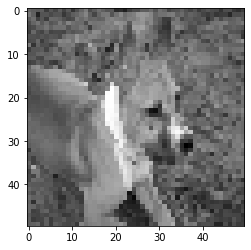

In [15]:
plt.imshow(training_data[0][0], cmap='gray')
plt.show()

In [66]:
print(training_data[0][1])

[0. 1.]
